In [268]:
import numpy as np
from matplotlib import pyplot as plt

H=0.01

def phi(mu, h):
    y0 = 0
    z0 = mu 
    X,Y,Z = taylor_third_order(y0, z0, h)
    return Z[-1] + Y[-1] - 2*np.exp(1)-1.1


def taylor_third_order(y0, z0, h):
    Y = []
    Z = []
    X = []
    y1 = y0
    z1 = z0
    x1 = 0
    Y.append(y1)
    Z.append(z1)
    X.append(x1)
    while(abs(1-x1)>10e-5):
        y0 = y1
        z0 = z1
        y1 = y0 + h*z0+ h*h*(y0+8.2+3.1*x1-3.1*x1*x1)/2
        z1 = z0 + h*(y0+8.2+3.1*x1-3.1*x1*x1)+h*h*(11.3 - 3.1*x1 - 3.1*x1*x1+y0)
        Y.append(y1)
        Z.append(z1)
        x1+=h
        X.append(x1)
    return X, Y, Z




In [269]:
def search_bounds(start=-100):
    while phi(start, H) < 0:
        start += 1
    print(phi(start-1, H), phi(start, H))
    return start - 1, start

In [270]:
mu0, mu1 = search_bounds()
print(mu0, mu1)

-2.2984641482102908 0.41768928878447786
-4 -3


In [271]:

def hordes(mu_0, mu_1):
  mu = (mu_0 + mu_1) / 2
  mu_prev = mu_0
  while np.abs(phi(mu, H)-phi(mu_prev, H)) > 10e-6:
    mu_2 = mu - (phi(mu, H) / (phi(mu, H) - phi(mu_prev, H))) * (mu - mu_prev)
    mu_prev = mu
    mu = mu_2
  return mu

In [272]:
mu = hordes(mu0, mu1)
y0 = 0
z0 = mu
X, y_shoot, z = taylor_third_order(y0, z0, H)

In [273]:
print(f'mu = {mu}, phi(mu) = {phi(mu, H)}')

mu = -3.1537797103416296, phi(mu) = 4.440892098500626e-16


In [274]:
def analitic_solution(x):
    return -2 + np.exp(-x) + np.exp(x) - 3.1 * x + 3.1 * x ** 2

In [275]:
y_a = [analitic_solution(x_i) for x_i in X]

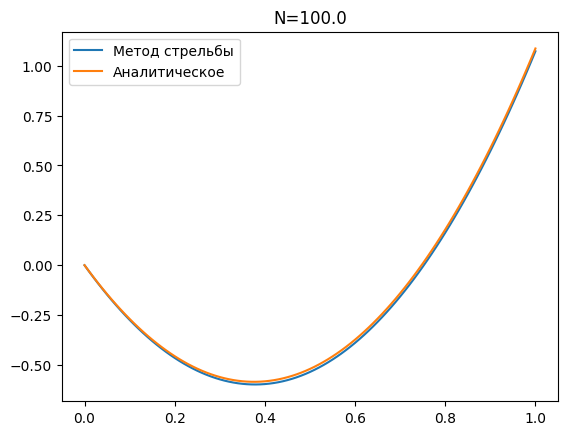

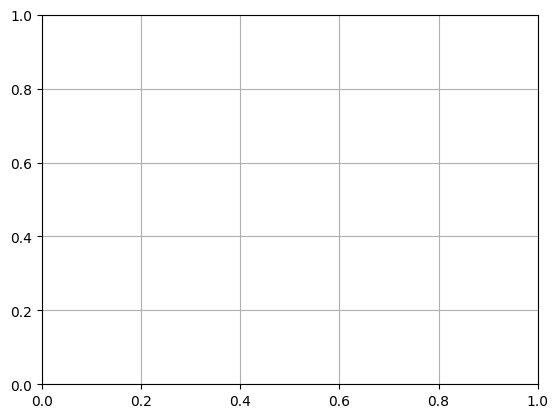

In [276]:
plt.title(f'N={1/H}')
plt.plot(X, y_shoot, label = "Метод стрельбы")
plt.plot(X, y_a, label = "Аналитическое")
plt.legend()
plt.savefig(f"analShooting{1/H}.png")
plt.show()
plt.grid(True)

In [277]:
def tridiagonal():
    N =int(1/H)
    y = [0] * N
    lam = [0] * N # [2 / (2 + h**2)] * N
    mu = [0] * N #[-(h**2 * (2*ALPHA + 2 + ALPHA*h*(1-h)) - 2 * ALPHA * h) / (2 + h**2)] * N

    a = 1
    b = -(2 + H**2)
    c = 1
    d = [H**2 * (8.2 + 3.1*k - 3.1 * k * k) for k in X]

    for i in range(0, N - 2):
        lam[i+1] = -c / (a * lam[i] + b)
        mu[i+1] = (d[i] - a * mu[i]) / (a * lam[i] + b)

    y[N-1] = (H * (2 * np.exp(1) + 1.1) + mu[N-2]) / (1 + H - lam[N-2])

    for i in range(N-1, 1, -1):
        y[i-1] = y[i]*lam[i-1] + mu[i-1]

    return y

In [278]:
y_trid = tridiagonal()
N = int(1/H)

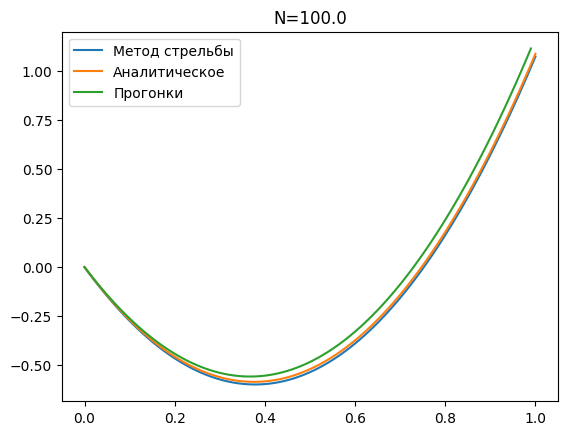

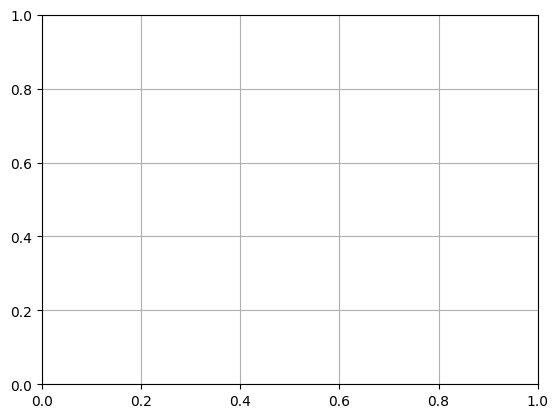

In [279]:
plt.title(f'N={1/H}')
plt.plot(X, y_shoot, label = "Метод стрельбы")
plt.plot(X, y_a, label = "Аналитическое")
plt.plot(X[:N], y_trid, label ="Прогонки")
plt.legend()
plt.savefig(f"allmethods{1/H}.png")
plt.show()
plt.grid(True)
